# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset consists of the medical appointments from 100k patients in Brazil. In this data it is clear that some of these patients show up for their appointments while others do not. Failing to show up for an appointment puts patients at risk as their condition may worsen over time. Therefore, there is a lot of interest around patients behavoir regarding appointments.This report is focused on gaining insights as to why some patients don't show up while others do.
The columns present and their significance are:

```
PatientId         : Patient idntification number
AppointmentID     : Patient appointment identification number
Gender            : Gender of patient
ScheduledDay      : Date and time of appointment
AppointmentDay    : Day of appointment
Age               : Age of patient
Neighbourhood     : Neighbourhood of patient
Scholarship       : Scholarship category of patient
Hipertension      : Hypertension status of patient
Diabetes          : Diabetes status of patient 
Alcoholism        : Alcoholic status of patient
Handcap           : Handicape level of patient
SMS_received      : Did the patient receive a SMS reminder
No-show           : Did the patient show up or not?
``` 


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
#### Question 1: Which age group misses the most appointments ?
#### Question 2: Which gender misses the most appointment?
#### Question 3: Which age group with Diabetes attends their appointment the most?
#### Question 4: Which age group with Diabetes attends their appointment the most?
#### Question 5: Which handicaped age group attends their appointment the most?
#### Question 6: Which age group battling alcoholism attends their appointment the most?


In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

In [4]:
appointment = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv',\
                          parse_dates=['ScheduledDay','AppointmentDay'])


`To begin, the data is loaded`

In [5]:
appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


`The first 5 rows are printed for explore data`

In [6]:
#Identify the number of cases and the number of features of these cases 
appointment.shape

(110527, 14)

`The dimensions of the data is explored`

In [7]:
#Identify the datatype of the features 
appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [8]:
#investigate the presence of missing values in each feature
appointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

`Additionally, It is seen that the data has no missing values`

In [9]:
#investigate the presence of duplicates 
appointment.duplicated().sum()

0

`Investigate the presence of duplicates` 

In [10]:
appointment.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

`The total columns are explored`


### Data Cleaning
 

In [11]:

appointment.drop(['PatientId', 'AppointmentID'],axis=1,inplace=True)

`PatientID and appointmentID are droped because they are generic identifiers and do not have any relationship with appointment fulfillment` 

In [12]:
appointment.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


`The statistics of the data is explored to identify outliers. In this case there is a minimum age of -1, which is an outlier and is removed as there cannot be a negetive age.`

In [13]:
index_drop = appointment.query('Age == Age.min()').index
index_drop

Int64Index([99832], dtype='int64')

`The index of the outlier age is selected to be dropped` 

In [14]:
appointment.drop(index=index_drop,inplace=True)

`The outlier age row is dropped`

In [15]:
appointment.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


`The data is inspected finally for make sure outlier is dropped`

In [16]:
appointment['No_show'] = [1 if x =='Yes' else 0 for x in appointment['No-show']]

`create a Series by converting No-show columns, which is the dependent variable, to numerical values and add it to the DataFrame`

In [17]:
appointment.drop('No-show',axis=1,inplace=True)

`Drop the original No-show columns`

In [18]:
appointment.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


`Inspect DataFrame to confirm changes`

<a id='eda'></a>
## Exploratory Data Analysis


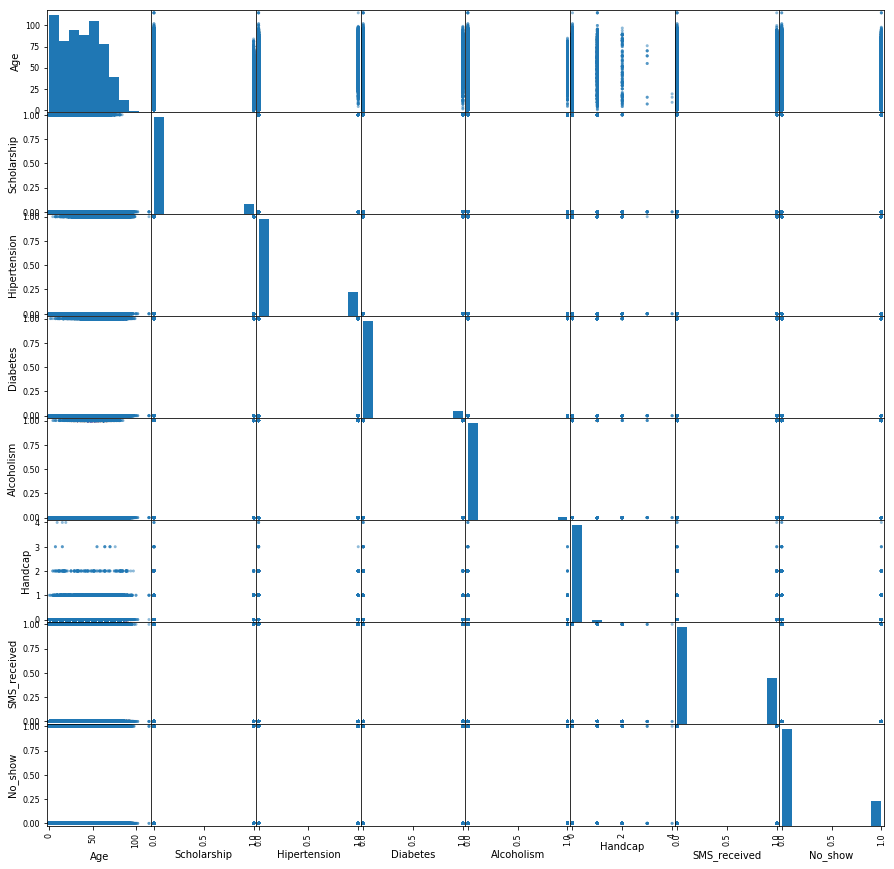

In [19]:
def plot_scatter(df):
    pd.plotting.scatter_matrix(df,figsize=(15,15));

plot_scatter(appointment)

`A scatter matrix is plotted with the dataframe to investigate any possible relationship/ trend among the data features.`

`It is seen that *Age* has significant relationship with hypertension, diabetes, alcoholism,hadcap and No_show.`

`Thus the analysis begins by ivestigating age.`

In [20]:
appointment.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
No_show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


`Also, the correlation statistic between the features are investigated.`

`It is seen that Age, Hipertension, Diabetes,Alcoholism	have negative correnation with 'No_show'.`

In [21]:
bin_edges = [0,16,30,45,60,115]
bin_names = ['Child','Young_adults','Middle_adults','Late_adults','Senior_citizen']
appointment['age_groups'] = pd.cut(appointment['Age'],bin_edges,labels=bin_names)


`The age feature is binned into age-groups to create clear distinction`

| Age range     | Age group  | 
| ------------- |:-------------:|
| 0 - 16        | Child         | 
| 16- 30        | Young_adults  |   
| 30- 45        | Middle_adults |
| 45- 60        | Late_adults   |
| 60-115        | Senior_citizens|



### Research Question 1 : Which age group attended appointments the most ?

In [22]:
appointment.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_groups
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Senior_citizen
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Late_adults
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Senior_citizen
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Child
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Late_adults


In [23]:
attended_distribution = appointment.query("No_show==1").groupby('age_groups')['No_show'].count()
attended_distribution

age_groups
Child             4962
Young_adults      4889
Middle_adults     4692
Late_adults       4131
Senior_citizen    3006
Name: No_show, dtype: int64

`Get the distribution of age groups who attended their appointment`

In [24]:
total_distribution = appointment.groupby('age_groups')['No_show'].count()
total_distribution

age_groups
Child             22331
Young_adults      19761
Middle_adults     21954
Late_adults       23179
Senior_citizen    19762
Name: No_show, dtype: int64

`Get the distribution of total appointment scheduled by age groups`

In [25]:
proportional_distribution = (attended_distribution/total_distribution)

`Get the proportion of patients who attended appointment to the total appointment schedule`

In [26]:
attend_index = proportional_distribution.index.categories.tolist()
attend_index

['Child', 'Young_adults', 'Middle_adults', 'Late_adults', 'Senior_citizen']

`Get the index of the Series, which is a list of age groups `

In [27]:
attend_values = proportional_distribution.values
attend_values

array([ 0.22220232,  0.24740651,  0.2137196 ,  0.17822167,  0.15211011])

`Get the values`

In [28]:
def plot(index,values,ylabel,xlabel,title):
    plt.bar(index,values,color='g',width=0.5);
    plt.xticks(rotation=45);
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    plt.title(title);

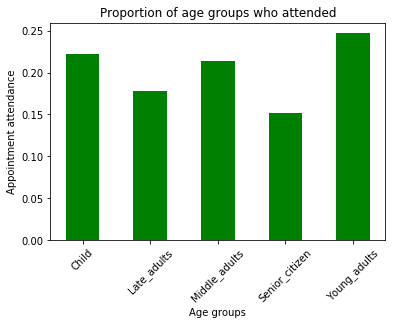

In [29]:
ylabel = 'Appointment attendance'
xlabel = 'Age groups'
title  = 'Proportion of age groups who attended'

plot(attend_index,attend_values,ylabel,xlabel,title)   

`Bar chart showing proportionate number of patients who attended their appointment according to their age groups`
#### Discussion
 Therefore, young adults attend appointments most followed by children and the senior adults attend appointments the least.

### Research Question 2 : Which age group missed the most appointments ?

In [30]:
missed_distribution = appointment.query("No_show==0").groupby('age_groups')['No_show'].count()
missed_distribution


age_groups
Child             17369
Young_adults      14872
Middle_adults     17262
Late_adults       19048
Senior_citizen    16756
Name: No_show, dtype: int64

`Get the distribution of age groups who missed their appointment`

In [31]:
total_distribution = appointment.groupby('age_groups')['No_show'].count()
total_distribution

age_groups
Child             22331
Young_adults      19761
Middle_adults     21954
Late_adults       23179
Senior_citizen    19762
Name: No_show, dtype: int64

`Get the distribution of total appointment scheduled by age groups`

In [32]:
missed_proportional_distribution = (missed_distribution/total_distribution)
missed_proportional_distribution


age_groups
Child             0.777798
Young_adults      0.752593
Middle_adults     0.786280
Late_adults       0.821778
Senior_citizen    0.847890
Name: No_show, dtype: float64

`Get the proportion of patients who missed appointment to the total appointment schedule`

In [33]:
missed_index = missed_proportional_distribution.index.categories.tolist()
missed_index

['Child', 'Young_adults', 'Middle_adults', 'Late_adults', 'Senior_citizen']

`Get the index of the Series, which is a list of age groups `

In [34]:
missed_values = missed_proportional_distribution.values
missed_values

array([ 0.77779768,  0.75259349,  0.7862804 ,  0.82177833,  0.84788989])

`Get the values`

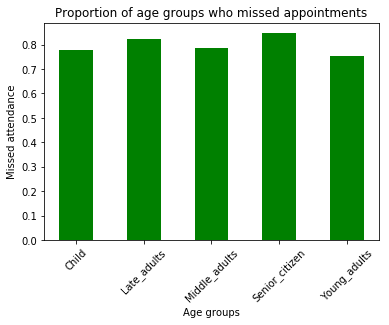

In [35]:
ylabel ='Missed attendance'
xlabel = 'Age groups'
title  = 'Proportion of age groups who missed appointments'

plot(missed_index,missed_values,ylabel,xlabel,title) 

`Bar chart showing proportionate number of patients who missed their appointment according to their age groups`
#### Discussion
 Therefore, opposite to the prior results, young adults missed their appointments least. On the contrary, senior adults miss their  appointments the most.

# Research Question 3: Which gender missed the most appointmen?


In [36]:
gender_missed_distribution = appointment.query('No_show==0').groupby('Gender')['No_show'].count()
gender_missed_distribution


Gender
F    57245
M    30962
Name: No_show, dtype: int64

`Get the gender distribution of pateints who missed their appointment`

In [37]:
total_gender_distribution = appointment.groupby('Gender')['No_show'].count()
total_gender_distribution

Gender
F    71839
M    38687
Name: No_show, dtype: int64

`Get the gender distribution of total appointment scheduled`

In [38]:
proportion = (gender_missed_distribution/total_gender_distribution)
proportion

Gender
F    0.796851
M    0.800321
Name: No_show, dtype: float64

`Get the proportion of patients who missed appointment to the total appointment schedule grouped by gender`

In [39]:
gender_index = proportion.index.tolist()
gender_index

['F', 'M']

In [40]:
gender_values = proportion.values
gender_values

array([ 0.79685129,  0.80032052])

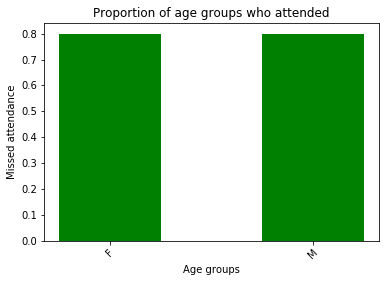

In [41]:
ylabel = 'Missed attendance'
xlabel = 'Age groups'
title  = 'Proportion of age groups who attended'
    
plot(gender_index,gender_values,ylabel,xlabel,title) 

`Bar chart showing proportionate number of patients who missed their appointment according to gender`
#### Discussion
 It is evident that both genders equally miss their appointment at almost the same proportions. Therefore, gender alone is not a good indicator of whether a patient will miss an appointment or not.

# Question 4: Which age group with Diabetes attends their appointment the most?

In [42]:
with_diabetes = appointment.query('No_show==1').groupby(['age_groups','Diabetes'])['No_show'].count()

with_diabetes_attened = with_diabetes[[1,3,5,7,9]]
with_diabetes_attened

age_groups      Diabetes
Child           1            12
Young_adults    1            42
Middle_adults   1           157
Late_adults     1           489
Senior_citizen  1           730
Name: No_show, dtype: int64

`Distribution of patients with diabetes by age groups`

In [43]:
entire_appointments = appointment.groupby(['age_groups'])['No_show'].count()

entire_appointments

age_groups
Child             22331
Young_adults      19761
Middle_adults     21954
Late_adults       23179
Senior_citizen    19762
Name: No_show, dtype: int64

`Entire patients population that sheduled appointments, including those with and without diabetes`

In [44]:
ratio = with_diabetes_attened/entire_appointments
ratio_index = ratio.index.levels[0].tolist()
ratio_values = ratio.values

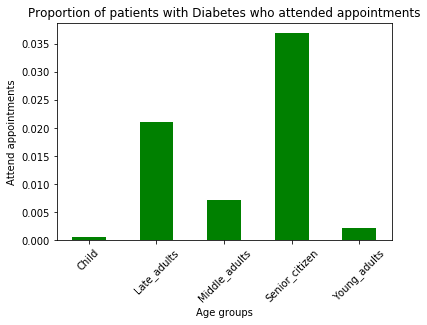

In [45]:
ylabel = 'Attend appointments'
xlabel = 'Age groups'
title = 'Proportion of patients with Diabetes who attended appointments'
    
plot(ratio_index,ratio_values,ylabel,xlabel,title) 

`Bar chart showing proportionate number of patients with diabetes who attend their appointment according to age groups`
#### Discussion
 It is evident that senior citizens with diabetes attend appointments the most followed by late adults, with children who have diabetes attending appointments the least. Thus, if a patient is a senior citizen and is diabetic, they are most likely to attend appointments.

# Question 5: Which age group with hypertension attends their appointment the most?

In [46]:
with_hypertension = appointment.query('No_show==1').groupby(['age_groups','Hipertension'])['No_show'].count()

with_hypertension_attended = with_hypertension[[1,3,5,7,9]]
with_hypertension_attended

age_groups      Hipertension
Child           1                  9
Young_adults    1                 74
Middle_adults   1                510
Late_adults     1               1418
Senior_citizen  1               1761
Name: No_show, dtype: int64

In [47]:
total_ages = appointment.groupby(['age_groups'])['No_show'].count()
total_ages

age_groups
Child             22331
Young_adults      19761
Middle_adults     21954
Late_adults       23179
Senior_citizen    19762
Name: No_show, dtype: int64

In [48]:
hyper_ratio = with_hypertension_attended/total_ages
hyper_ratio_index = hyper_ratio.index.levels[0].tolist()
hyper_ratio_values = hyper_ratio.values

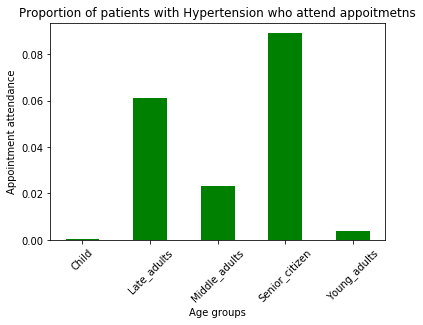

In [49]:
ylabel = 'Appointment attendance'
xlabel = 'Age groups'
title  = 'Proportion of patients with Hypertension who attend appoitmetns'

plot(hyper_ratio_index,hyper_ratio_values,ylabel,xlabel,title) 

`Bar chart showing proportionate number of patients with hypertension who attend their appointment according to age groups`
#### Discussion
Similar to previous question, it is evident that senior citizens with hypertension attend appointments the most followed by late adults, with children who have who the disease attending appointments the least. Thus, if a patient is a senior citizen or late adult with hypertension, they are most likely to attend appointments.

# Question 6: Which age group battling alcoholism attends their appointment the most?

In [50]:
with_alcoholism = appointment.query('No_show==1').groupby(['age_groups','Alcoholism'])['No_show'].count()

with_alcoholism_attended = with_alcoholism[[1,3,5,7,9]]
with_alcoholism_attended

age_groups      Alcoholism
Child           1              11
Young_adults    1              81
Middle_adults   1             204
Late_adults     1             285
Senior_citizen  1              96
Name: No_show, dtype: int64

In [51]:
total_ages = appointment.groupby(['age_groups'])['No_show'].count()

total_ages

age_groups
Child             22331
Young_adults      19761
Middle_adults     21954
Late_adults       23179
Senior_citizen    19762
Name: No_show, dtype: int64

In [52]:
alcoholism_ratio = with_alcoholism_attended/total_ages
alcoholism_ratio_index = alcoholism_ratio.index.levels[0].tolist()
alcoholism_ratio_values = alcoholism_ratio.values

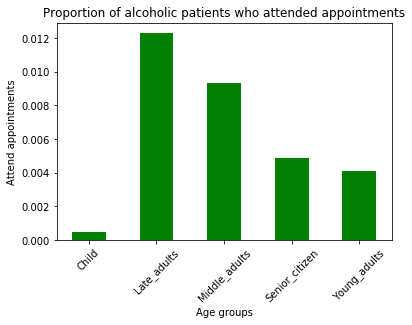

In [53]:

ylabel = 'Attend appointments'
xlabel = 'Age groups'
title  = 'Proportion of alcoholic patients who attended appointments'

plot(alcoholism_ratio_index,alcoholism_ratio_values,ylabel,xlabel,title) 

`Bar chart showing proportionate number of alcoholic patients who attend their appointment according to age groups`
#### Discussion
Unlike previous results, it is evident that late adults and middle aged adults with alcoholic problems attend appointments the most followed by senior citizens, with children attending appointments the least. Thus, if a patient is a late adults or middle-aged adults with alcoholic problems, they are most likely to attend appointments.

<a id='conclusions'></a>
## Conclusions

Young adults attend appointments most followed by children and the senior adults attend appointments the least. Additional information about whether children are accompanied by parents could be useful in explaining why they attend appointment.

Additionally young adults missed their appointments least. On the contrary, senior adults miss their appointments the most.

It is evident that both genders equally miss their appointment at almost the same proportions. Therefore, gender alone is not a good indicator of whether a patient will miss an appointment or not.

Investigating patients with diabetes, it is evident that senior citizens with diabetes attend appointments the most followed by late adults, with children who have diabetes attending appointments the least. Thus, if a patient is a senior citizen and is diabetic, they are most likely to attend appointments.

Looking at patients with Hypertension, it is evident that senior citizens with hypertension attend appointments the most followed by late adults, with children who have the disease attending appointments the least. Thus, if a patient is a senior citizen or late adult with hypertension, they are most likely to attend appointments.

Unlike previous results, it is evident that late adults and middle aged adults with alcoholic problems attend appointments the most followed by senior citizens, with children attending appointments the least. Thus, if a patient is a late adults or middle-aged adults with alcoholic problems, they are most likely to attend appointments.

**Limitation**
<p>1. It must be noted that this dataset is from Brazil and does not constitute a global sample, thus thrends may differ from different regions of the world.</p> 
<p>2. The correlation coefficient between features and "No_show" was not investigated </p>



In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0